<a href="https://colab.research.google.com/github/ragaashritha/Project--4/blob/master/Iteration_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Summary#
#Introduced dropout at every layer
#Increased learning rate and introduced scheduler
#Increased Batch size
#Increased epochs
#Accuracy:99.41 in Epoch 12

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


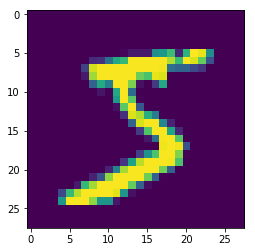

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [18]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(Convolution2D(15, 3, 3, activation='relu',use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(Convolution2D(26, 3, 3, activation='relu',use_bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) # 11
model.add(Dropout(0.10))


model.add(Convolution2D(15, 3, 3, activation='relu',use_bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(Convolution2D(26, 3, 3, activation='relu',use_bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.10))



model.add(Convolution2D(10, 1, activation='relu',use_bias=False)) #7
model.add(BatchNormalization())


model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", use_bias=False)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activatio

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 15)        1350      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 26)        3510      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.007 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.007), metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.007.
60000/60000 [==============================] - 259s 4ms/step - loss: 0.1318 - acc: 0.9591 - val_loss: 0.0418 - val_acc: 0.9866
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.0053070508.
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0369 - val_acc: 0.9883
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.0042735043.
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0441 - acc: 0.9861 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.0035769034.
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0362 - acc: 0.9887 - val_loss: 0.0292 - val_acc: 0.9902
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.0030755712.
60000/60000 [======